##Data Preprocessing

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv('/content/winequality-red.csv')

In [3]:
data

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [5]:
data['quality'].unique()

array([5, 6, 7, 4, 8, 3])

In [6]:
data.corr()['quality'].sort_values(ascending=False)

quality                 1.000000
alcohol                 0.476166
sulphates               0.251397
citric acid             0.226373
fixed acidity           0.124052
residual sugar          0.013732
free sulfur dioxide    -0.050656
pH                     -0.057731
chlorides              -0.128907
density                -0.174919
total sulfur dioxide   -0.185100
volatile acidity       -0.390558
Name: quality, dtype: float64

Text(0, 0.5, 'alcohol')

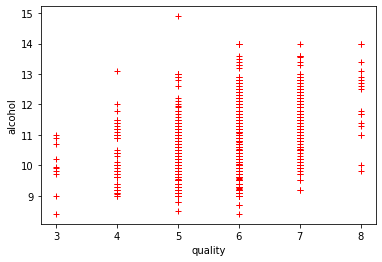

In [7]:
plt.plot(data['quality'], data['alcohol'], 'r+')
plt.xlabel('quality')
plt.ylabel('alcohol')

##Regression

###Seperate Features and Target

In [8]:
X = data.iloc[:,:-1].values
y = data.iloc[:, -1].values

###Splitting Data into Train and Test 

In [9]:
from sklearn.model_selection import train_test_split

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

###Standardization

In [11]:
from sklearn.preprocessing import StandardScaler

In [12]:
dtrain = y_train.reshape(len(y_train), 1)
dtest = y_test.reshape(len(y_test), 1)

In [13]:
X_sc = StandardScaler()
y_sc = StandardScaler()

In [14]:
Xd_train = X_sc.fit_transform(X_train)
yd_train = y_sc.fit_transform(dtrain)

In [15]:
Xd_test = X_sc.transform(X_test)
yd_test = y_sc.transform(dtest)

In [16]:
Xd_train

array([[ 0.14383943,  0.56476956, -0.5261802 , ..., -1.43441478,
        -0.83346911, -1.05993584],
       [ 1.16621405, -1.4732501 ,  1.08035906, ...,  0.1032955 ,
         1.26426195,  0.44656   ],
       [-1.27612532, -0.26145463, -0.94077098, ...,  0.87215064,
        -0.71359876,  0.72902796],
       ...,
       [-0.76493801,  0.67493278, -1.30353791, ...,  1.00029316,
         0.06555849, -0.87162386],
       [-0.08335493,  0.59231036, -0.88894713, ..., -0.15298955,
         0.54503987,  0.44656   ],
       [-0.08335493, -0.97751559,  0.30300135, ..., -0.28113207,
         0.90465091,  0.54071598]])

In [17]:
yd_train

array([[-0.77572759],
       [ 0.45523468],
       [ 0.45523468],
       ...,
       [ 0.45523468],
       [ 0.45523468],
       [ 0.45523468]])

### Training On Different Algorithms

In [18]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.preprocessing import PolynomialFeatures

In [19]:
r_reg = RandomForestRegressor()
l_reg = LinearRegression()
d_reg = DecisionTreeRegressor()
s_reg = SVR()
p_reg = LinearRegression()

In [20]:
X_pol = PolynomialFeatures()
X_pol = X_pol.fit_transform(Xd_train)

In [21]:
temp = PolynomialFeatures()
temp = temp.fit_transform(Xd_test)

In [22]:
r_reg.fit(Xd_train, yd_train)
l_reg.fit(Xd_train, yd_train)
d_reg.fit(Xd_train, yd_train)
s_reg.fit(Xd_train, yd_train)
p_reg.fit(X_pol, yd_train)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [23]:
r_pred = r_reg.predict(Xd_test)
l_pred = l_reg.predict(Xd_test)
d_pred = d_reg.predict(Xd_test)
s_pred = s_reg.predict(Xd_test)
p_pred = p_reg.predict(temp)

In [24]:
from sklearn.metrics import r2_score

In [25]:
r = r2_score(yd_test, r_pred)
l = r2_score(yd_test, l_pred)
d = r2_score(yd_test, d_pred)
s = r2_score(yd_test, s_pred)
p = r2_score(yd_test, p_pred)

In [26]:
print('rf = ', r,'l = ', l,'dt = ', d,'svr = ', s,'p = ', p)

rf =  0.45476182504461526 l =  0.3400508813706389 dt =  0.12569686823860127 svr =  0.33981886891764723 p =  0.26366969277864705


##Classification

###Separate Features and Target

In [27]:
x = data.iloc[:, :-1].values
y = data.iloc[:, -1].values

###Splitting Data into Train and Test sets

In [28]:
from sklearn.model_selection import train_test_split

In [29]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

###Standardization

In [30]:
from sklearn.preprocessing import StandardScaler

In [31]:
sc = StandardScaler()

In [32]:
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

###Train on different algorithms

In [33]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

In [34]:
l_cla = LogisticRegression()
k_cla = KNeighborsClassifier()
d_cla = DecisionTreeClassifier()
r_cla = RandomForestClassifier()
s_cla = SVC(kernel='linear')
ks_cla = SVC(kernel='rbf')

In [35]:
l_cla.fit(x_train, y_train)
k_cla.fit(x_train, y_train)
d_cla.fit(x_train, y_train)
r_cla.fit(x_train, y_train)
s_cla.fit(x_train, y_train)
ks_cla.fit(x_train, y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [36]:
l_pred = l_cla.predict(x_test)
k_pred = k_cla.predict(x_test)
d_pred = d_cla.predict(x_test)
r_pred = r_cla.predict(x_test)
s_pred = s_cla.predict(x_test)
ks_pred = ks_cla.predict(x_test)

In [37]:
from sklearn.metrics import confusion_matrix

In [38]:
l_c = confusion_matrix(y_test, l_pred)
k_c = confusion_matrix(y_test, k_pred)
d_c = confusion_matrix(y_test, d_pred)
r_c = confusion_matrix(y_test, r_pred)
s_c = confusion_matrix(y_test, s_pred)
ks_c = confusion_matrix(y_test, ks_pred)

In [39]:
l_c

array([[ 0,  3,  3,  1,  0],
       [ 0, 99, 23,  2,  0],
       [ 0, 43, 89, 10,  0],
       [ 0,  3, 32,  8,  0],
       [ 0,  0,  3,  1,  0]])

In [40]:
k_c

array([[ 0,  0,  0,  0,  0,  0],
       [ 0,  0,  5,  2,  0,  0],
       [ 1,  1, 92, 29,  1,  0],
       [ 0,  2, 38, 90, 12,  0],
       [ 0,  0,  8, 22, 13,  0],
       [ 0,  0,  0,  2,  2,  0]])

In [41]:
d_c

array([[ 0,  0,  0,  0,  0,  0],
       [ 1,  0,  2,  3,  1,  0],
       [ 3,  5, 84, 28,  4,  0],
       [ 0,  9, 34, 78, 21,  0],
       [ 0,  0,  3, 19, 19,  2],
       [ 0,  0,  1,  1,  1,  1]])

In [42]:
r_c

array([[  0,   4,   3,   0,   0],
       [  0, 108,  16,   0,   0],
       [  1,  35,  99,   7,   0],
       [  0,   0,  26,  17,   0],
       [  0,   0,   2,   2,   0]])

In [43]:
s_c

array([[  0,   4,   3,   0,   0],
       [  0, 100,  24,   0,   0],
       [  0,  45,  97,   0,   0],
       [  0,   3,  40,   0,   0],
       [  0,   0,   4,   0,   0]])

In [44]:
ks_c

array([[  0,   6,   1,   0,   0],
       [  0, 101,  23,   0,   0],
       [  0,  46,  90,   6,   0],
       [  0,   1,  35,   7,   0],
       [  0,   0,   2,   2,   0]])

In [45]:
from sklearn.metrics import accuracy_score

In [46]:
l_a = accuracy_score(y_test, l_pred)
k_a = accuracy_score(y_test, k_pred)
d_a = accuracy_score(y_test, d_pred)
r_a = accuracy_score(y_test, r_pred)
s_a = accuracy_score(y_test, s_pred)
ks_a = accuracy_score(y_test, ks_pred)

In [47]:
print('Logistic Regression: ' + str(l_a) + '\nKNN: ' + str(k_a) + '\nDecision Tree: ' + str(d_a) + '\nRandom Forest: ' + str(r_a) + '\nLinear SVC: ' + str(s_a) + '\nKernel SVC: ' + str(ks_a))

Logistic Regression: 0.6125
KNN: 0.609375
Decision Tree: 0.56875
Random Forest: 0.7
Linear SVC: 0.615625
Kernel SVC: 0.61875


In [48]:
grade = [(data['quality']>=6.5), (data['quality']<6.5)]
grading = ['Good', 'Bad']
data['Review'] = np.select(grade, grading)

In [49]:
data

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Review
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,Bad
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5,Bad
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5,Bad
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6,Bad
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,Bad
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5,Bad
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6,Bad
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6,Bad
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5,Bad
